# Enterprises data in maps

### load libraries we need

In [131]:
import datetime
import string
import pandas as pd
import numpy as np
import pysal
from shapely.geometry import mapping, shape, Polygon, Point
from geopandas import GeoDataFrame, GeoSeries
import matplotlib.pyplot as plt
%matplotlib inline

## Map of madagascar

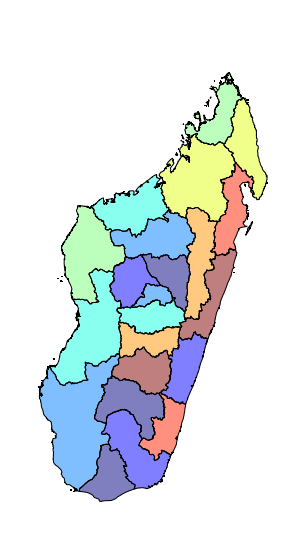

In [132]:
path_to_shapefile = '/media/herimanitra/DONNEES/TBE/mdg/MDG_adm2.shp'
df = GeoDataFrame.from_file(path_to_shapefile)
ax = df.plot(figsize=(9, 9))
ax.set_axis_off()

### Rename variables from the shapefile to be more explicit

In [133]:
df.rename(columns={'NAME_1':'province','ID_2': 'code_region',
                   'NAME_2':'region'},inplace=True)

### rename an attribute

In [134]:
mask=[i for i,x in enumerate(df.region) if x=='Atsimo-Atsinana']
df.loc[mask,'region']='Atsimo-Atsinanana'

## Map subset of the map (:>region)

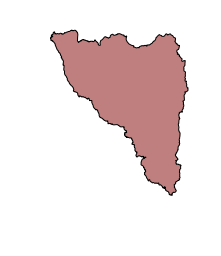

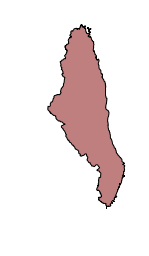

In [135]:

ax1 = df[df.region=="Analamanga"].plot()
ax1.set_axis_off()

ax2 = df[df.region=="Sava"].plot()
ax2.set_axis_off()

### Loading reference code of Commune, fokontany

In [136]:
eses=pd.read_csv('/media/herimanitra/DONNEES/TBE/mdg/ese2013_2015.csv')

### Cleaning region code

#### select subset of a column and impute values from substring of an other column

In [137]:
mask = [i for i,x in  enumerate(eses.REGION) if x in ['nan','na',0.0,1.0,2.0,3.0,4.0,5.0,'5',7.0,"AM","M","N"] ]
eses.loc[mask,'REGION'] =eses.loc[mask,'FIRAIS'].apply(lambda x: str(x)[:2]) 

#### initialize a new column then assign values

In [138]:
eses['REGION_NAME']=''
mask=[i for i,x in  enumerate(eses.REGION) if x in [101.0,"10",'11',11.0] ]
eses.loc[mask,'REGION_NAME']='Analamanga'
mask=[i for i,x in  enumerate(eses.REGION) if x in [12.0,"12"] ]
eses.loc[mask,'REGION_NAME']="Vakinankaratra"
mask=[i for i,x in  enumerate(eses.REGION) if x in [13.0,"13"] ]
eses.loc[mask,'REGION_NAME']="Itasy"
mask=[i for i,x in  enumerate(eses.REGION) if x in [14.0,'14'] ]
eses.loc[mask,'REGION_NAME']="Bongolava"
mask=[i for i,x in  enumerate(eses.REGION) if x in ["20",21.0,"21"] ]
eses.loc[mask,'REGION_NAME']="Haute matsiatra"
mask=[i for i,x in  enumerate(eses.REGION) if x in [22.0,'22'] ]
eses.loc[mask,'REGION_NAME']="Amoron'i mania"
mask=[i for i,x in  enumerate(eses.REGION) if x in [23.0,'23'] ]
eses.loc[mask,'REGION_NAME']="Vatovavy Fitovinany"
mask=[i for i,x in  enumerate(eses.REGION) if x in [24.0,'24'] ]
eses.loc[mask,'REGION_NAME']="Ihorombe"
mask=[i for i,x in  enumerate(eses.REGION) if x in ['25',25.0] ]
eses.loc[mask,'REGION_NAME']="Atsimo-Atsinanana"
mask=[i for i,x in  enumerate(eses.REGION) if x in ["30","31",31.0] ]
eses.loc[mask,'REGION_NAME']="Atsinanana"
mask=[i for i,x in  enumerate(eses.REGION) if x in ['32',32.0] ]
eses.loc[mask,'REGION_NAME']="Analanjirofo"
mask=[i for i,x in  enumerate(eses.REGION) if x in [33.0] ]
eses.loc[mask,'REGION_NAME']="Alaotra-Mangoro"
mask=[i for i,x in  enumerate(eses.REGION) if x in ["40","41",41.0] ]
eses.loc[mask,'REGION_NAME']="Boeny"
mask=[i for i,x in  enumerate(eses.REGION) if x in [42.0,"42"] ]
eses.loc[mask,'REGION_NAME']="Sofia"
mask=[i for i,x in  enumerate(eses.REGION) if x in [43.0] ]
eses.loc[mask,'REGION_NAME']="Betsiboka"
mask=[i for i,x in  enumerate(eses.REGION) if x in [44.0,'44'] ]
eses.loc[mask,'REGION_NAME']="Melaky"
mask=[i for i,x in  enumerate(eses.REGION) if x in ["50","51",51.0] ]
eses.loc[mask,'REGION_NAME']="Atsimo-Andrefana"
mask=[i for i,x in  enumerate(eses.REGION) if x in [52.0] ]
eses.loc[mask,'REGION_NAME']="Androy"
mask=[i for i,x in  enumerate(eses.REGION) if x in ['53',53.0] ]
eses.loc[mask,'REGION_NAME']="Anosy"
mask=[i for i,x in  enumerate(eses.REGION) if x in ["54",54.0] ]
eses.loc[mask,'REGION_NAME']="Menabe"
mask=[i for i,x in  enumerate(eses.REGION) if x in ["71"] ]
eses.loc[mask,'REGION_NAME']="Diana"
mask=[i for i,x in  enumerate(eses.REGION) if x in [72.0,'72'] ]
eses.loc[mask,'REGION_NAME']="Sava"
mask= eses.REGION_NAME==''
eses.loc[mask,'REGION_NAME']='Analamanga'

### Number of enterprises by region

In [139]:
eses['TotalEses']=eses[['Name','REGION_NAME']].groupby('REGION_NAME').transform("count")
X= ['TotalEses','REGION_NAME']
CountEses= eses[X].drop_duplicates(subset = X, inplace = False)
CountEses

,TotalEses,REGION_NAME
0,988,Anosy
1,1161,Sava
2,1561,Vatovavy Fitovinany
5,61732,Analamanga
8,1696,Analanjirofo
29,2058,Itasy
57,5886,Atsinanana
67,4313,Boeny
68,2726,Alaotra-Mangoro
79,422,Betsiboka


### Merge information (Number of Enterprises) with GeoDataframe

In [140]:
CountEses.rename(columns={'REGION_NAME':'region'},inplace=True)
df = df.merge(CountEses, on="region")

## Mapping of Number of enterprises by region

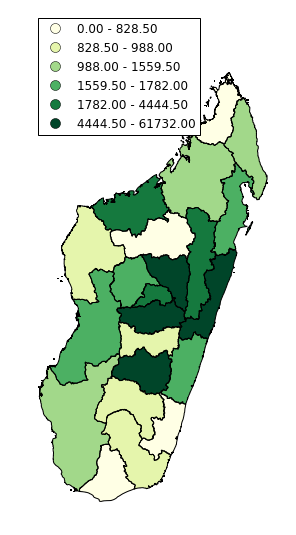

In [141]:
kw = dict(column='TotalEses', k=6, cmap='YlGn',figsize=(9, 9),alpha=1,legend=True)
ax = df.plot(scheme='QUANTILES', **kw)
ax.set_axis_off()

In [142]:
df[['region','TotalEses']].sort_values(by=['TotalEses'], ascending=False) 

,region,TotalEses
0,Analamanga,61732
3,Vakinankaratra,7185
17,Atsinanana,5886
8,Haute matsiatra,4576
12,Boeny,4313
15,Alaotra-Mangoro,2726
2,Itasy,2058
1,Bongolava,1782
16,Analanjirofo,1696
21,Menabe,1638


This may not be accurate as enterprises movement evolves in real time and every day but It should be a good proxy of the reality

### Which region is more likely to absorb unemployment ?

#### loading population projection in 2014

In [143]:
pop = pd.read_csv("/media/herimanitra/DONNEES/TBE/tbemadagascar/population2014.csv")

In [144]:
pop.head()

,region,annee,age,masculin,feminin,ensemble
0,Analamanga,2014,15-19,189168.755110,178257.049270,367425.804380
1,Analamanga,2014,20-24,142625.669503,139368.503756,281994.173259
2,Analamanga,2014,25-29,107727.230343,136258.119243,243985.349586
3,Analamanga,2014,30-34,127134.896190,124978.080541,252112.976731
4,Analamanga,2014,35-39,102383.914680,99575.931183,201959.845862


#### agregate population [15-49[ by region

In [145]:
pop['TotalPop']=pop[['ensemble','region']].groupby('region').transform("sum")
X= ['TotalPop','region']
CountPop= pop[X].drop_duplicates(subset = X, inplace = False)
CountPop

,TotalPop,region
0,1.672845e+06,Analamanga
7,8.139309e+05,Vakinankaratra
14,3.187519e+05,Itasy
21,2.072188e+05,Bongolava
28,5.139181e+05,Haute matsiatra
35,3.150549e+05,Amoron'i mania
42,5.948812e+05,Vatovavy Fitovinany
49,1.639104e+05,Ihorombe
56,3.772713e+05,Atsimo-Atsinanana
63,5.869493e+05,Atsinanana


### Merge information (population) with GeoDataframe

In [146]:
df= df.merge(CountPop, on="region")

# Where are you likely to find a job in Madagascar ?

### Population by enterprises (unadjusted)

In [147]:
df['EsesbyPop']=df['TotalEses']/df['TotalPop']

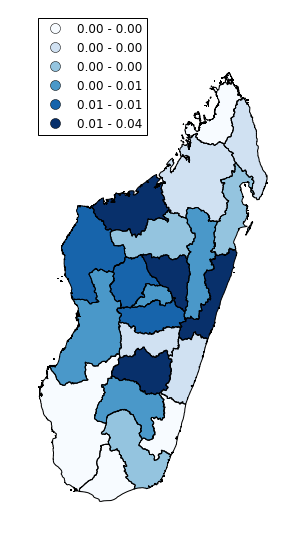

In [148]:
kw = dict(column='EsesbyPop', k=6, cmap='Blues',figsize=(9, 9),alpha=1,legend=True)
ax = df.plot(scheme='QUANTILES', **kw)
ax.set_axis_off()

In [149]:
df[['region','EsesbyPop']].sort_values(by=['EsesbyPop'], ascending=False) 

,region,EsesbyPop
0,Analamanga,0.036902
12,Boeny,0.011220
17,Atsinanana,0.010028
8,Haute matsiatra,0.008904
3,Vakinankaratra,0.008828
1,Bongolava,0.008600
13,Melaky,0.006955
2,Itasy,0.006456
9,Ihorombe,0.005863
15,Alaotra-Mangoro,0.005534


# Number of vocational education channels by population [15-29[

In [150]:
vocational = pd.read_csv('/media/herimanitra/DONNEES/TBE/vocational_training_center.csv')

### clean region labels (rename and lower case )

In [151]:
vocational.rename(columns={'REGION':'region'},inplace=True)
vocational['region']=vocational.region.apply(lambda x: string.capwords(x.lower()) )

In [152]:
mask = [ i for i,x in enumerate(vocational.region) if x in 'Betsi Boka']
vocational.loc[mask,'region']='Betsiboka'
mask = [ i for i,x in enumerate(vocational.region) if x in "Amoron'i Mania"]
vocational.loc[mask,'region']="Amoron'i mania"
mask = [ i for i,x in enumerate(vocational.region) if x in "Atsimo-andrefana"]
vocational.loc[mask,'region']="Atsimo-Andrefana"
mask = [ i for i,x in enumerate(vocational.region) if x in "Atsimo-atsinanana"]
vocational.loc[mask,'region']="Atsimo-Atsinanana"
mask = [ i for i,x in enumerate(vocational.region) if x in "Alaotra-mangoro"]
vocational.loc[mask,'region']="Alaotra-Mangoro"
mask = [ i for i,x in enumerate(vocational.region) if x in 'Vatovavy-fitovinany']
vocational.loc[mask,'region']="Vatovavy Fitovinany"
mask = [ i for i,x in enumerate(vocational.region) if x in 'Matsiatra Ambony']
vocational.loc[mask,'region']="Haute matsiatra"

### calculate number of vocational education  channels by region:

In [153]:
vocational['TotalChannels']=vocational[['FILIERES','region']].groupby('region').transform("count")
X= ['TotalChannels','region']
CountCenters= vocational[X].drop_duplicates(subset = X, inplace = False)
CountCenters

,TotalChannels,region
0,192,Analamanga
83,11,Itasy
94,31,Vakinankaratra
131,2,Bongolava
133,33,Diana
166,6,Sava
172,3,Sofia
175,30,Boeny
208,4,Betsiboka
212,3,Melaky


### add region of Androy as It is not there

In [154]:
CountCenters = CountCenters.append(pd.DataFrame([[0, 'Androy']], columns=['TotalChannels','region']))

### merge total channels by region with Geodataframe

In [155]:
df= df.merge(CountCenters, on="region")

### calculate population between [15-29[

In [156]:
mask = [i for i,x in enumerate(pop.age) if x in ['15-19','20-24','25-29'] ]
pop15_29= pop.loc[mask]
X= ['ensemble','region']
pop15_29['TotalPop15_29']= pop15_29[X].groupby('region').transform("sum")
pop15_29= pop15_29[['TotalPop15_29','region']].drop_duplicates(subset = ['TotalPop15_29','region'], inplace = False)
pop15_29

,TotalPop15_29,region
0,893405.327224,Analamanga
7,430250.745273,Vakinankaratra
14,168762.894799,Itasy
21,111721.521283,Bongolava
28,286728.399378,Haute matsiatra
35,176653.656488,Amoron'i mania
42,347445.175716,Vatovavy Fitovinany
49,95371.877643,Ihorombe
56,217288.458031,Atsimo-Atsinanana
63,329634.085507,Atsinanana


### merge number of vocational education centers with Geodataframe


In [157]:
df= df.merge(pop15_29, on="region")

### calculate number of vocational education channels by Population [15-29]

In [158]:
df['ChannelsByPop']=10000*df['TotalChannels']/df['TotalPop15_29']

# Mapping of vocational training channels by young population [15-29[

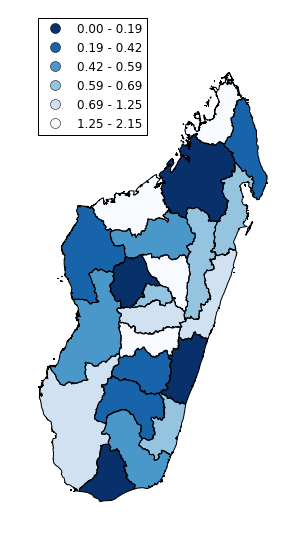

In [159]:
kw = dict(column='ChannelsByPop', k=6, cmap='Blues_r',figsize=(9, 9),alpha=1,legend=True)
ax = df.plot(scheme='QUANTILES', **kw)
ax.set_axis_off()

## regions ranking 

In [160]:
df[['region','ChannelsByPop']].sort_values(by=['ChannelsByPop'], ascending=False) 

,region,ChannelsByPop
0,Analamanga,2.149081
4,Diana,1.904527
6,Amoron'i mania,1.528414
12,Boeny,1.376499
20,Atsimo-Andrefana,1.123867
17,Atsinanana,0.758417
3,Vakinankaratra,0.720510
15,Alaotra-Mangoro,0.691914
7,Atsimo-Atsinanana,0.690327
2,Itasy,0.651802


## Sources

* http://www.metfp.gov.mg/annuaires.html